<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/CU/Lab4_Curie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab4 Curie experiment

Evgeny Kolonsky 2025

v0.1.0

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

In [190]:
def survival_function(x, height, loc, sigma, offset):
    return height * norm.sf(x, loc, sigma) + offset

def smooth(signal, window_size=30):
  # Create the kernel for a simple moving average
  # Each element in the window gets a weight of 1/window_size
  kernel = np.ones(window_size) / window_size
  # Perform the convolution
  smoothed_signal = np.convolve(signal, kernel, mode='same')
  return smoothed_signal



# Sample 1

In [191]:
#set 1
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/set12_sample1/scan_N1.csv'
time_, temp, voltage = np.loadtxt(url, delimiter=',', skiprows=1, usecols=[0, 1, 2], unpack=True)

# skip 1st 10 seconbds
time = time_[time_>10]
temp = temp[time_>10]
voltage = voltage[time_>10]


dtemp = np.gradient(temp) / np.gradient(time)



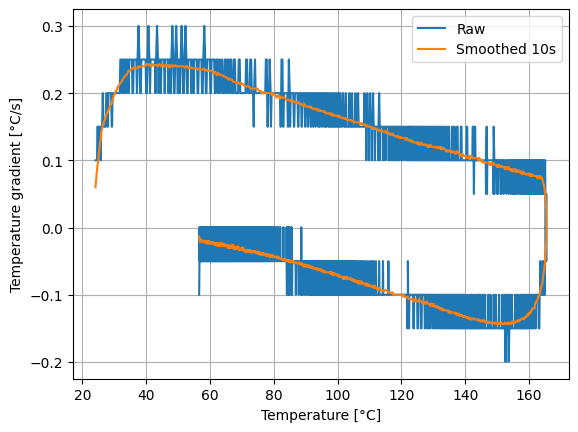

In [192]:
plt.plot(temp, dtemp, label='Raw')

plt.grid()
plt.xlabel('Temperature [°C]')
plt.ylabel('Temperature gradient [°C/s]')

dtemp_smoothed = smooth(dtemp)

plt.plot(temp, dtemp_smoothed, label='Smoothed 10s')
plt.legend()

# Timeline

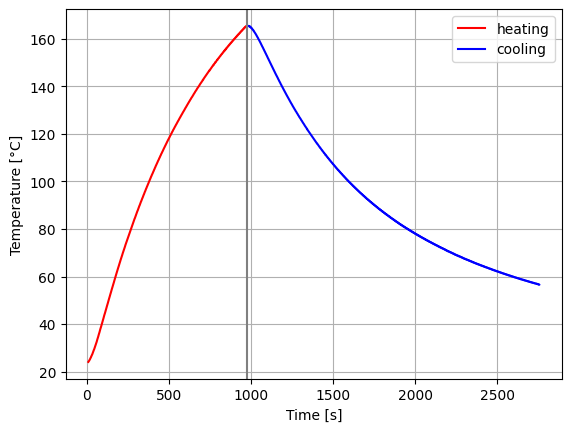

In [193]:
ix = np.argmax(temp)
t0 = time[ix]
temp_max = np.max(temp)

plt.plot(time[time<t0], temp[time<t0], color='red', label='heating')
plt.plot(time[time>t0], temp[time>t0], color='blue', label='cooling')
plt.axvline(t0, color='gray')
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Temperature [°C]')
plt.legend()


(-5.285940036474518, 5.360244833074397)

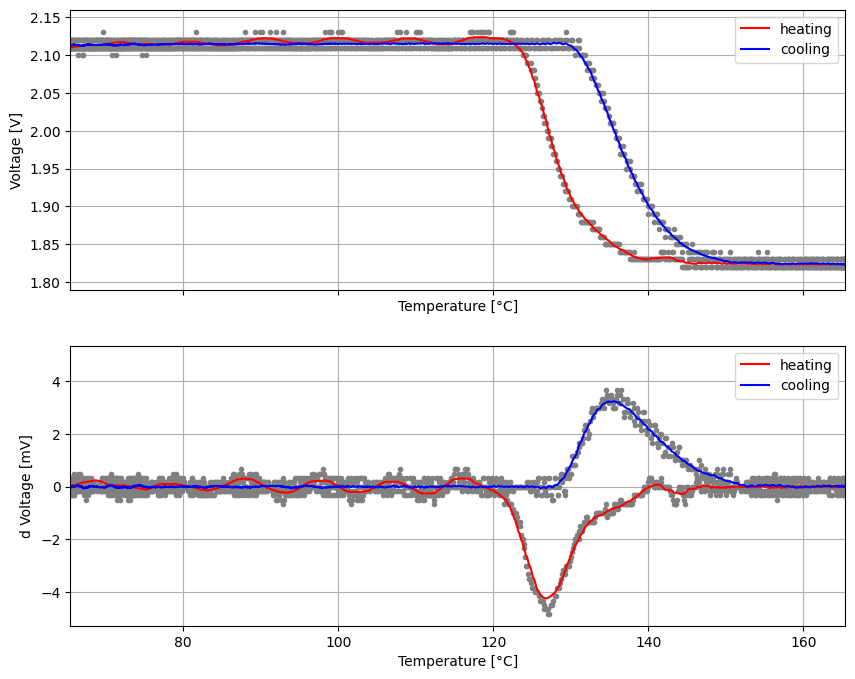

In [194]:
fig, ax = plt.subplots(2, 1, figsize=(10,8), sharex=True)

ax[0].plot(temp, voltage, '.', color='gray')
v = smooth(voltage)
ax[0].plot(temp[time<t0], v[time<t0], color='red', label='heating')
ax[0].plot(temp[time>t0], v[time>t0], color='blue', label='cooling')
ax[0].legend()
ax[0].set_xlim(temp_max-130, temp_max)
ax[0].grid()
ax[0].set_xlabel('Temperature [°C]')
ax[0].set_ylabel('Voltage [V]')
ax[0].set_ylim(np.min(voltage)-0.03, np.max(voltage)+0.03)

dv = np.gradient(v) *1e3
dvs = smooth(dv)
ax[1].plot(temp, dv, '.', color='gray')
ax[1].plot(temp[time<t0], dvs[time<t0], color='red', label='heating')
ax[1].plot(temp[time>t0], dvs[time>t0], color='blue', label='cooling')
ax[1].set_xlim(temp_max-100, temp_max)
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('Temperature [°C]')
ax[1].set_ylabel('d Voltage [mV]')
dv0, dvsigma = np.mean(dvs), np.std(dvs)
ax[1].set_ylim(dv0 -  dvsigma-1, dv0 + dvsigma + 1)




[  0.29022948 128.23366099   3.48920885   1.8275172 ]
[  0.28759047 137.14662359   4.28885829   1.82696477]
Chi2 reduced (heating): 0.62
Chi2 reduced (cooling): 0.35
Heating fit Tc: 128 ± 3 °C
Cooling fit Tc: 137 ± 4 °C


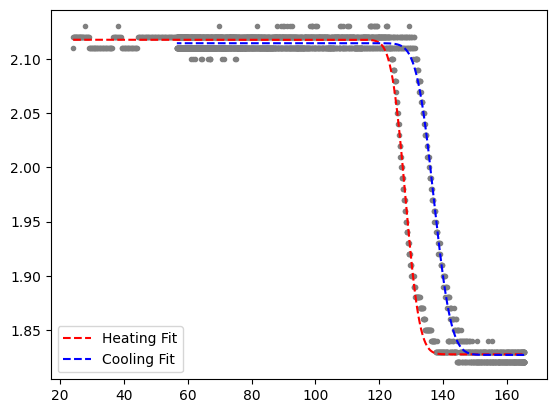

In [195]:
plt.plot(temp, voltage, '.', color='gray')
# Fit the heating curve
#initial = [0.6, 250, 20, 1.8]
initial = [0.3, 140, 20, 1.8]
popt_heating, pcov_heating = curve_fit(survival_function, temp[time<t0], voltage[time<t0], p0=initial)
print(popt_heating)
# Fit the cooling curve
popt_cooling, pcov_cooling = curve_fit(survival_function, temp[time>t0], voltage[time>t0], p0=initial)
print(popt_cooling)
# Plot the fitted curves

uncertainty = 0.01 # V

chi2_observed = np.sum(((voltage[time<t0] - survival_function(temp[time<t0], *popt_heating)) / uncertainty)**2)
chi2_reduced = chi2_observed / (len(temp[time<t0]) - len(popt_heating))
print(f'Chi2 reduced (heating): {chi2_reduced:.2f}')

chi2_observed = np.sum(((voltage[time>t0] - survival_function(temp[time>t0], *popt_cooling)) / uncertainty)**2)
chi2_reduced = chi2_observed / (len(temp[time>t0]) - len(popt_cooling))
print(f'Chi2 reduced (cooling): {chi2_reduced:.2f}')


plt.plot(temp[time<t0], survival_function(temp[time<t0], *popt_heating), 'r--', label='Heating Fit')
plt.plot(temp[time>t0], survival_function(temp[time>t0], *popt_cooling), 'b--', label='Cooling Fit')
plt.legend()
Tc_heating, Tc_heating_sigma = popt_heating[1], popt_heating[2]
Tc_cooling, Tc_cooling_sigma = popt_cooling[1], popt_cooling[2]
print(f'Heating fit Tc: {Tc_heating:.0f} ± {Tc_heating_sigma:.0f} °C')
print(f'Cooling fit Tc: {Tc_cooling:.0f} ± {Tc_cooling_sigma:.0f} °C')

# Sample 2

(-6.125193622612255, 6.2222756922749705)

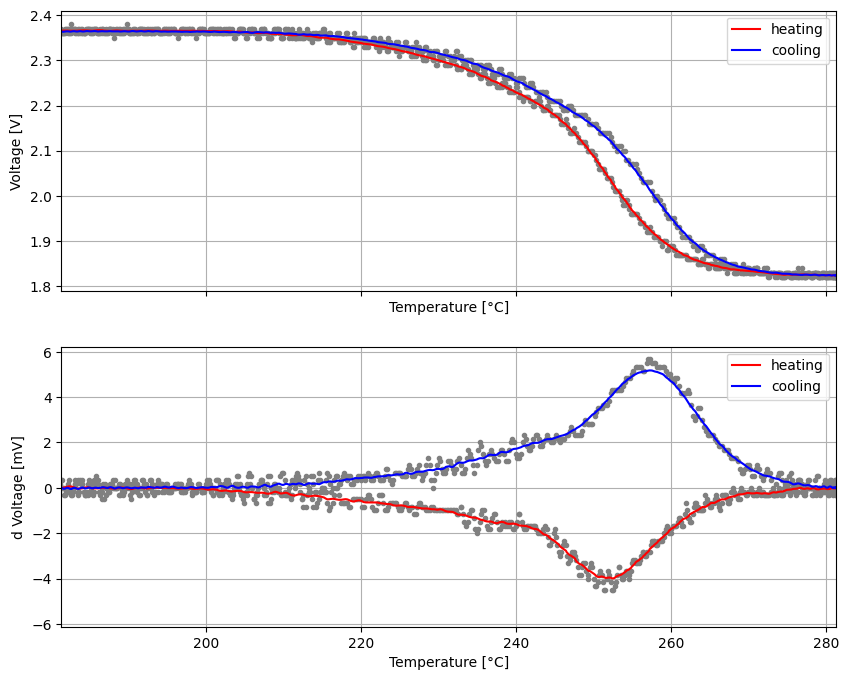

In [202]:
url = 'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Curie/sample2/test2/12/12%2050%20V%20Heater.csv'
time_, temp, voltage = np.loadtxt(url, delimiter=',', skiprows=1, usecols=[0, 1, 2], unpack=True)

# skip 1st 10 seconbds
time = time_[time_>10]
temp = temp[time_>10]
voltage = voltage[time_>10]


dtemp = np.gradient(temp) / np.gradient(time)

# timeline
ix = np.argmax(temp)
t0 = time[ix]
temp_max = np.max(temp)

fig, ax = plt.subplots(2, 1, figsize=(10,8), sharex=True)

ax[0].plot(temp, voltage, '.', color='gray')
v = smooth(voltage)
ax[0].plot(temp[time<t0], v[time<t0], color='red', label='heating')
ax[0].plot(temp[time>t0], v[time>t0], color='blue', label='cooling')
ax[0].legend()
ax[0].set_xlim(temp_max-130, temp_max)
ax[0].grid()
ax[0].set_xlabel('Temperature [°C]')
ax[0].set_ylabel('Voltage [V]')
ax[0].set_ylim(np.min(voltage)-0.03, np.max(voltage)+0.03)

dv = np.gradient(v) *1e3
dvs = smooth(dv)
ax[1].plot(temp, dv, '.', color='gray')
ax[1].plot(temp[time<t0], dvs[time<t0], color='red', label='heating')
ax[1].plot(temp[time>t0], dvs[time>t0], color='blue', label='cooling')
ax[1].set_xlim(temp_max-100, temp_max)
ax[1].grid()
ax[1].legend()
ax[1].set_xlabel('Temperature [°C]')
ax[1].set_ylabel('d Voltage [mV]')
dv0, dvsigma = np.mean(dvs), np.std(dvs)
ax[1].set_ylim(dv0 -  dvsigma-1, dv0 + dvsigma + 1)


Fit by survival function

[  0.54746784 248.69486704  11.96659047   1.8113141 ]
[  0.55906021 252.91757284  13.10809399   1.79941685]
Chi2 reduced (heating): 1.94
Chi2 reduced (heating): 1.13
Heating fit Tc: 249 ± 12 °C
Cooling fit Tc: 253 ± 13 °C


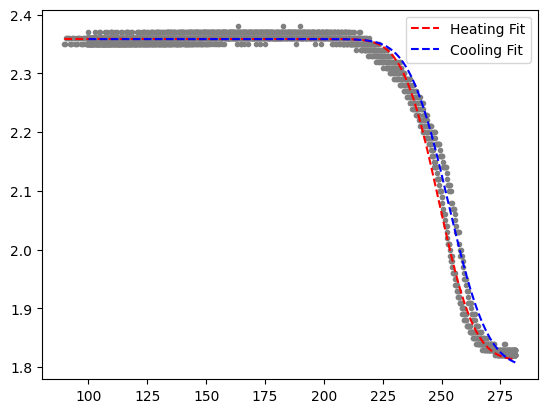

In [201]:
plt.plot(temp, voltage, '.', color='gray')
# Fit the heating curve
initial = [0.6, 250, 20, 1.8]
popt_heating, pcov_heating = curve_fit(survival_function, temp[time<t0], voltage[time<t0], p0=initial)
print(popt_heating)
# Fit the cooling curve
popt_cooling, pcov_cooling = curve_fit(survival_function, temp[time>t0], voltage[time>t0], p0=initial)
print(popt_cooling)
# Plot the fitted curves

uncertainty = 0.01 # V

chi2_observed = np.sum(((voltage[time<t0] - survival_function(temp[time<t0], *popt_heating)) / uncertainty)**2)
chi2_reduced = chi2_observed / (len(temp[time<t0]) - len(popt_heating))
print(f'Chi2 reduced (heating): {chi2_reduced:.2f}')

chi2_observed = np.sum(((voltage[time>t0] - survival_function(temp[time>t0], *popt_cooling)) / uncertainty)**2)
chi2_reduced = chi2_observed / (len(temp[time>t0]) - len(popt_cooling))
print(f'Chi2 reduced (heating): {chi2_reduced:.2f}')

plt.plot(temp[time<t0], survival_function(temp[time<t0], *popt_heating), 'r--', label='Heating Fit')
plt.plot(temp[time>t0], survival_function(temp[time>t0], *popt_cooling), 'b--', label='Cooling Fit')
plt.legend()
Tc_heating, Tc_heating_sigma = popt_heating[1], popt_heating[2]
Tc_cooling, Tc_cooling_sigma = popt_cooling[1], popt_cooling[2]
print(f'Heating fit Tc: {Tc_heating:.0f} ± {Tc_heating_sigma:.0f} °C')
print(f'Cooling fit Tc: {Tc_cooling:.0f} ± {Tc_cooling_sigma:.0f} °C')